In [1]:
import numpy as np
import matplotlib.pyplot as plt
from FlowControl import add_to_class
from pandas import DataFrame,Series

<h1>Naive Bayes classifier</h1>

<h2>1. Theoretical introduction</h2>

<h3>1.1 Naive Bayse assumption</h3>

Let's suppose that we are given a data set $\{(\vec{x}^{(i)},y^{(i)})\}_{i=1}^{n}$ in which $\vec{x}^{(i)}$ is a vector of $d$ components. Each component $x_{k}^{(i)}\in \{0,1,\ldots,K_{k}\}$. 

Our goal is to find $p(y|\vec{x})$. In order to obtain this we wish to find reversed conditional distributions and probability of occurence certain value of $y$.

**Naive Bayes assumption** is the following: **Occurence of different events $x_{k}$ is conditionaly indepenedent of given $y$**. This means that:
$$
p(x_{j}|y) = p(x_{j}|y,x_{k}) \hspace{1cm} j\neq k
$$

We can use the above condition for evalutaing total probability distribution. First, let's see that $p(\vec{x}|y)$ can be factorize:
$$
p(x_{1}|y)p(x_{2}|y,x_{1})\ldots p(x_{d}|y,x_{1}\ldots x_{d-1}) = 
\frac{p(x_{1}\wedge y)}{p(y)}\frac{p(x_{1}\wedge x_{2}\wedge y)}{p(x_{1}\wedge y)}\ldots \frac{p(x_{1}\wedge \ldots \wedge x_{d}\wedge y)}{p(x_{1}\wedge \ldots \wedge x_{d-1}\wedge y)} = \frac{p(x_{1}\wedge \ldots \wedge x_{d}\wedge y)}{p(y)}
$$
$$
p(\vec{x}|y) = p(x_{1}|y)p(x_{2}|y,x_{1})\ldots p(x_{d}|y,x_{1}\ldots x_{d-1})
$$
Then, applying our NB assumption, one should obtain:
$$
p(\vec{x}|y) = \prod_{k=1}^{d}p(x_{k}|y)
$$

Given training dataset we can estimate conditional probability distributions by calculating conditional frequencies of occurece.
$$
p(x_{k} = p|y = q) = \frac{\sum_{i=1}^{n}\delta_{x_{k}^{(i)},p}\delta_{y^{(i)},q}}{\sum_{i=1}^{n}\delta_{y^{(i)},q}}
$$
$$
p(y=q) = \frac{\sum_{i=1}^{n}\delta_{y^{(i)},q}}{n} 
$$

<h3>1.2 Bayesian inference</h3>

$$
p(y = s| \vec{x}) = \frac{p(\vec{x}|y=s)p(y=s)}{p(\vec{x})} = 
\frac{\prod_{k=1}^{d}p(x_{k}|y=s)p(y=s)}{\sum_{s' = 1}^{K}p(\vec{x},y = s')} =
$$
$$
=\frac{\prod_{k=1}^{d}p(x_{k}|y=s)p(y=s)}{\sum_{s' = 1}^{K}\prod_{k=1}^{d}p(x_{k}|y = s')p(y = s')}
$$

<h3>1.3 Laplace smoothing</h3>

The real problem arises if in our test set there is a feature that hasn't been included in our training set. Then the conditional probability is equal to $0/0$. In order to address this issue, one should apply **Laplace smoothing**, which means that the conditional probability should be calculated as following:

$$
p(x_{k} = p|y = q) = \frac{1 + \sum_{i=1}^{n}\delta_{x_{k}^{(i)},p}\delta_{y^{(i)},q}}{K_{k}+\sum_{i=1}^{n}\delta_{y^{(i)},q}}
$$
where $K_{k}$ is the number of possible values of $x_{k}$
$$
p(y=q) = \frac{1+\sum_{i=1}^{n}\delta_{y^{(i)},q}}{C + n} 
$$
where $q\in\{1,\ldots, C\}$

<h2>2. Implementation</h2>

<h3>2.1 Steps of implementation</h3>

- For given data set, which is 2-dim array of shape $(n,d)$, obtain distinct values of each columns and evaluate the value of $K_{k}$.
- For each possible $p,q$ and $k$, calculate $p(x_{k}=p|y = q)$ using Laplace smoothing, which is 3-dim array
- For each possible $q$, calculate $p(y = q)$ using Laplace Smoothing.
- After fitting procedure, if you are given input vector $\vec{x}$, calculate $p(y = s| \vec{x}) $

<h3>2.2 Code</h3>

In [2]:
class NaiveBayesCl:
    def __init__(self):
        pass

    def Prepare_data_set(self,X_data,y_data):
        raise NotImplementedError

    def fit(self,X_data,y_data):
        raise NotImplementedError
    
    def predict(self,X_data):
        raise NotImplementedError


In [3]:
@add_to_class(NaiveBayesCl)
def Prepare_data_set(self,X_data,y_data):
    self.Classes = [np.unique(X_data[:,i]) for i in range(X_data.shape[1])]
    self.Kks = [len(self.Classes[i]) for i in range(len(self.Classes))]
    self.y_Classes = np.unique(y_data)
    self.y_Kks = len(self.y_Classes)

@add_to_class(NaiveBayesCl)
def fit(self,X_train,y_train):
    mess =  f"Attributes Classes, y_Classes, Kks, y_Kks do not exist. You have to Prepare data first by running obj_name.Prepare_data_set"
    assert hasattr(self,"Classes") and hasattr(self,"y_Classes") and hasattr(self,"Kks") and hasattr(self,"y_Kks"), mess

    if len(X_train.shape) > 1:
        self.n,self.d = X_train.shape
    else:
        self.n = X_train.shape[0]
        self.d = 1

    d_q = (y_train[:,np.newaxis] == self.y_Classes[np.newaxis,:])

    p_kpq = []
    for k in range(self.d):
        X_temp = X_train[:,k]
        d_p = (X_temp[:,np.newaxis] == self.Classes[k][np.newaxis,:])
        sum_d = np.sum(d_p[:,:,np.newaxis] * d_q[:,np.newaxis,:],axis = 0)
        p_kpq.append((1+sum_d)/(self.Kks[k] + np.sum(d_q,axis = 0)))

    p_p = (1+ np.sum(d_q,axis = 0)) / (self.n + self.y_Kks)

    self.p_y = p_p
    self.p_cond = p_kpq


@add_to_class(NaiveBayesCl)
def predict(self,X_data):
    mess =  f"Attributes p_y,p_cond do not exist. You have to fit model to the data first by running obj_name.fit"
    assert hasattr(self,"p_y") and hasattr(self,"p_cond"), mess

    prod_ = 1
    for i in range(X_data.shape[1]):
        prod_ *= self.p_cond[i][X_data[:,i],:]
    
    #return np.argmax(self.p_y * prod_ / np.sum((self.p_y * prod_)[:,np.newaxis],axis = 1),axis = 1)
    return np.argmax(self.p_y * prod_ / np.sum((self.p_y * prod_),axis = 1)[:,np.newaxis],axis = 1)

<h3>2.3 Naive Bayes for simple classification</h3>

In [4]:
from pandas import concat

wether = np.array(["sunny","cloudy","mid"])

In [5]:
rng = np.random.default_rng(42)

numbers = [135,127,154,121]
avg_temp = [0,9,16,21]
std_temp = [5,6,5,3]
avg_humid = [0.5,0.5,0.1,0.9]
std_humid = [0.4,0.3,0.2,0.1]
seasons = ["winter","spring","summer","autumn"]

def get_season_data(avg_temp,std_temp,avg_humid,std_humid,size,season,seed = 42):
    rng = np.random.default_rng(seed)
    return {
        "temp" : rng.normal(loc = avg_temp,scale = std_temp,size = size),
        "wether" : wether[rng.integers(len(wether),size = size)],
        "humidity" : rng.normal(loc = avg_humid,scale = std_humid,size = size),
        "season" : season
    }

season_frames = [DataFrame(get_season_data(avg_temp[i],std_temp[i],avg_humid[i],std_humid[i],numbers[i],seasons[i],seed = i * 10)) for i in range(len(numbers))]
df = concat(season_frames).sample(frac = 1).reset_index(drop = True)

df[:8]

,temp,wether,humidity,season
0,9.772735,mid,0.257030,spring
1,3.546117,cloudy,-0.096391,spring
2,5.212567,mid,0.240560,winter
3,13.552251,cloudy,0.287273,summer
4,5.968957,mid,0.749679,spring
5,7.847138,cloudy,0.226682,summer
6,22.048891,mid,0.869479,autumn
7,22.608883,mid,0.864607,autumn


In [6]:
mod_df = DataFrame({
    "temp" : df["temp"].apply(lambda x : 0 if x < 5 else ( 1 if (x < 10) and (x >= 5) else ( 2 if (x < 15) and (x >= 10) else 3))),
    "wether" : df["wether"].apply(lambda x : 0 if x == "sunny" else (1 if x == "cloudy" else 2)),
    "humidity" : df["humidity"].apply(lambda x : 0 if x < 0.3 else(1 if (x >= 0.3 and x < 0.6) else 2))
    })

mod_y = DataFrame({
    "season" : df["season"].apply(lambda x : 0 if x == "winter" else (1 if x == "spring" else (2 if x == "summer" else 3)))
}) 

mod_df[:8]

,temp,wether,humidity
0,1,2,0
1,0,1,0
2,1,2,0
3,2,1,0
4,1,2,2
5,1,1,0
6,3,2,2
7,3,2,2


In [7]:
mod_y[:8]

,season
0,1
1,1
2,0
3,2
4,1
5,2
6,3
7,3


In [8]:
X_data = mod_df.to_numpy()
y_data = mod_y.to_numpy().flatten()

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,train_size=0.7)

model = NaiveBayesCl()
model.Prepare_data_set(X_data,y_data)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [10]:
print(f"y_pred : {y_pred}"+ "\n" +f"y_test : {y_test}")

y_pred : [2 1 3 2 0 2 2 1 2 0 3 2 2 3 0 2 1 2 2 1 2 3 0 2 2 1 3 3 0 2 2 2 3 2 3 3 2
 3 1 2 0 1 1 3 0 0 0 3 1 0 2 3 0 2 3 0 0 2 3 1 0 2 3 3 3 1 3 1 2 0 0 2 1 1
 2 1 3 2 3 1 0 1 1 1 3 1 0 3 3 0 2 2 0 2 0 2 0 3 1 3 0 0 0 3 2 3 0 0 2 0 2
 1 0 2 1 1 0 2 0 2 3 0 2 2 1 2 1 2 1 3 2 0 0 1 0 1 2 2 2 2 3 3 1 3 0 2 0 3
 0 3 2 3 0 3 0 2 2 2 0 0 0 0]
y_test : [2 1 3 2 0 2 1 0 2 0 3 0 2 3 0 2 1 2 2 0 2 3 0 0 1 1 3 3 0 2 2 2 1 2 3 3 2
 1 1 2 0 0 0 3 0 0 2 3 1 1 2 3 1 2 3 0 0 2 3 1 0 2 3 3 3 1 3 1 2 1 0 1 1 2
 2 1 3 1 3 1 0 1 1 1 3 1 0 3 3 1 2 3 1 2 0 2 0 3 1 3 2 0 1 3 2 3 0 1 2 0 2
 1 0 2 1 1 0 1 1 1 3 0 2 2 1 2 1 2 1 3 2 2 0 1 2 1 1 2 2 2 3 3 1 3 0 0 0 3
 0 1 1 2 0 3 0 2 2 2 0 0 0 1]


In [11]:
print(f"accuracy: {(y_pred == y_test).sum()/len(y_pred)}")

accuracy: 0.7901234567901234


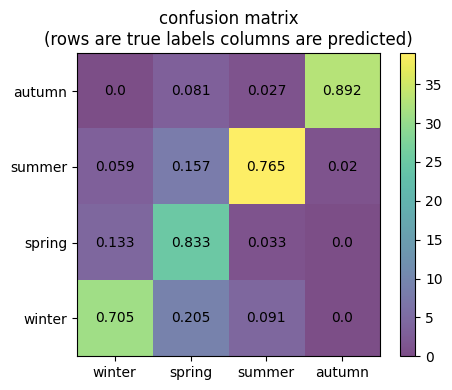

In [12]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize = (5,4),facecolor="white")
ax = fig.add_subplot()

cm = confusion_matrix(y_pred,y_test)
im = ax.imshow(cm,origin = "lower",alpha = 0.7,cmap="viridis")

m,n = cm.shape
for i in range(m):
    for j in range(n):
        percent = np.round((cm[j,i] / cm[j,:].sum()),3)
        ax.text(i,j,percent,color = "black",ha = "center",va = "center")

ax.set_title("confusion matrix\n(rows are true labels columns are predicted)",color = "black")
ax.set_xticks([0,1,2,3],seasons,color = "black")
ax.set_yticks([0,1,2,3],seasons,color = "black")
fig.colorbar(im,ax=ax)
plt.tight_layout()
plt.show()

In [13]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [14]:
nb = BernoulliNB().fit(X_train,y_train)
y_pred = nb.predict(X_test)
print(f"accuracy: {(y_pred == y_test).sum()/len(y_pred)}")


accuracy: 0.6234567901234568
